# Вспомогательные процедуры и функции

Подготовка библиотек и установка Google Disk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

Mounted at /content/drive


Функции

In [25]:
def str_columns_handling(column):
  stud_math[column] = stud_math[column].apply(lambda x: None if str(x).strip() == '' else x)

def column_info(column, numbers):
  # Параметр numbers: True вывод числовых колонок, False- вывод номинативных колонок
  nom_columns = ['Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'health']

  l_meanings = data[column].unique()
  n_rows = len(data)
  p_unfilled = round((n_rows - data[column].value_counts().sum())/n_rows * 100, 2) 
  if(numbers):
    if(((type(data[column][0]) == np.float64) | (type(data[column][0]) == np.int64)) & (not column in nom_columns)):
      print('\nNumbers column >>')
    else: 
      return;
  elif((type(data[column][0]) == np.str) | 
     # номинативные колонки с типом число
     (column in nom_columns)):
    print('\nNominative column >>')
  else:
    return;

  print('"', column, '": \n')
  if (numbers):
    print('Процент незаполненных {}%.'.format(p_unfilled))
  else:
    print('Уникальные значения {}.\nПроцент незаполненных {}%.'.format(l_meanings, p_unfilled))
    print(pd.DataFrame(data[column].value_counts()))

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break  

def quantiles_info(column):
  IQR = column.quantile(0.75) - column.quantile(0.25)
  perc25 = column.quantile(0.25)
  perc75 = column.quantile(0.75)
 
  print(
  '25-й перцентиль: {},'.format(perc25),
  '75-й перцентиль: {},'.format(perc75),
  "IQR: {}, ".format(IQR),
  "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


def del_outliers(column, arg):
  col = data[data[column] == arg].score;
  IQR = col.quantile(0.75) - col.quantile(0.25)
  perc25 = col.quantile(0.25)
  perc75 = col.quantile(0.75)
  return data[((data[column] == arg) & (data.score > perc25 - 1.5*IQR) &  (data.score < perc75 + 1.5*IQR)) | (data[column] != arg)]
  

def compare_bars(column):
  s1 = data[column].value_counts()
  s2 = drop_data[column].value_counts()
  plt.title('Колонка ' + column)
  p1 = plt.bar(s1.index, s1.values)
  p2 = plt.bar(s2.index, s2.values)
  plt.legend((p1[0], p2[0]), ('original', 'droped'))
  plt.show()    


def instead_zero(column, iz):
  data[column] = data[column].apply(lambda x: iz if x == 0 else x)   


def mean_fillna(columns):
  for col in columns:
    data[col].fillna(value=data[col].mean(), inplace=True)

def mode_fillna(columns):
  for col in columns:
    data[col].fillna(value=data[col].mode()[0], inplace=True)


Загрузка первичной информации 

In [3]:
stud_math = pd.read_csv('/content/drive/My Drive/stud_math.xls')
stud_math.info()
# Копируем исходную таблицу в результирующую,
# чтобы можно было использовать этот код на разных стадиях работы с данными
data = stud_math.loc[:]
stud_math

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Подготовка данных для анализа (на основе дальнейшего изучения данных). Далее вспомогательные ячейки, где собираются все операции подготовки данных

In [ ]:
data = stud_math.loc[stud_math.score > 0] # Удаление выбросов по score
data = data.drop(labels='studytime, granular', axis=1) # Удаление избыточного столбца
data = data.drop(labels=['sex', 'famsize', 'Pstatus', 'famsup', 'paid', 'nursery'], axis=1) # Удаление номинативных столбцов, слабо влияющих на score
# Удаление выбросов с сохранением незаполненных значение (условие после "|")
data = data.loc[data.Fedu.between(0, 4) | data.Fedu.apply(lambda x: math.isnan(float(x)))] 
data = data.loc[(data.famrel > 0) | data.famrel.apply(lambda x: math.isnan(float(x)))]

Заполнение номинативных столбцов

In [ ]:
# numbers
data.Medu.fillna(value=data.Medu.mean(), inplace=True)
data.Fedu.fillna(value=data.Fedu.mean(), inplace=True)
data.traveltime.fillna(value=data.traveltime.mean(), inplace=True)
data.studytime.fillna(value=data.studytime.mean(), inplace=True)
data.failures.fillna(value=data.failures.mean(), inplace=True)
data.famrel.fillna(value=data.famrel.mean(), inplace=True)
data.freetime.fillna(value=data.freetime.mean(), inplace=True)
data.goout.fillna(value=data.goout.mean(), inplace=True)
data.health.fillna(value=data.health.mean(), inplace=True)
# number column abscences
data.absences.fillna(value=data.absences.mean(), inplace=True)

In [ ]:
# strings
data.address.fillna(value=data.address.mode()[0], inplace=True)
data.Mjob.fillna(value=data.Mjob.mode()[0], inplace=True)
data.Fjob.fillna(value=data.Fjob.mode()[0], inplace=True)
data.reason.fillna(value=data.reason.mode()[0], inplace=True)
data.guardian.fillna(value=data.guardian.mode()[0], inplace=True)
data.schoolsup.fillna(value=data.schoolsup.mode()[0], inplace=True)
data.activities.fillna(value=data.activities.mode()[0], inplace=True)
data.higher.fillna(value=data.higher.mode()[0], inplace=True)
data.internet.fillna(value=data.internet.mode()[0], inplace=True)
data.romantic.fillna(value=data.romantic.mode()[0], inplace=True)

# Анализ целевой колонки **score** и отбор строк **score = 0** для удаления

Поскольку цель проекта исследовать данные и отобрать влияющие на оценку по математике, изучим в первую очередь данные, которые представляют эту оценку score

160    0.0
162    0.0
168    0.0
173    0.0
389    0.0
Name: score, dtype: float64

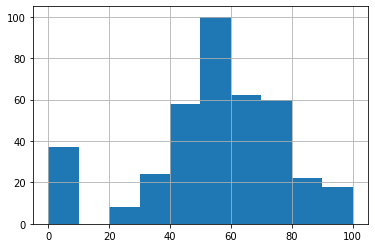

In [12]:
stud_math.score.describe()
stud_math.score.hist()
stud_math[stud_math.score < 20].score.sort_values(ascending=True).tail()

Видим набор строк с **score = 0**, которые по внешним признакам являются выбросом.  Забегая вперед, отметим, что данные этих строк искажают картину в колонке **absences** при **absences = 0**: 

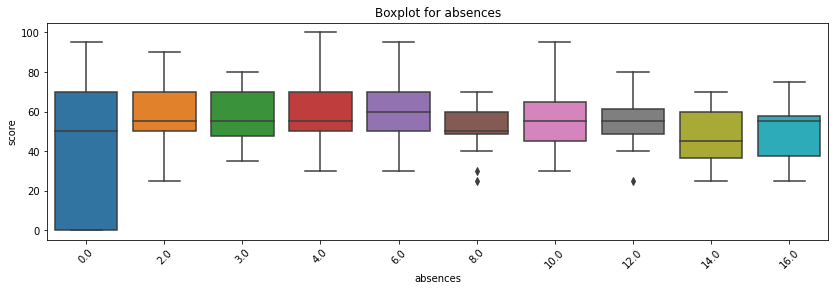

In [13]:
data = stud_math.loc[:]
get_boxplot('absences')

Проведем количественную оценку **score** = 0

In [14]:
num_0 = len(stud_math[stud_math.score  == 0].score)
per = round(num_0/len(stud_math)*100, 2)
print('Нулевых значений - {} \n %% - {}'.format(num_0, per ))

Нулевых значений - 37 
 %% - 9.37


Таких менее 10%, поэтому их отсутствие не должно сильно повлиять на дальнейший анализ. Убедимся, что это так, оценив визульно по номинативным колонкам какую часть удаляемая информация составляет от исходной. 

*   Выделим удаляемую информацию в отдельную таблицу
*   Сравним графически исходную и удаляемую информацию по столбцам



In [15]:
# записываем предлагаемую к удалению информацию в отдельную таблицу
drop_data = stud_math.loc[stud_math.score == 0] 

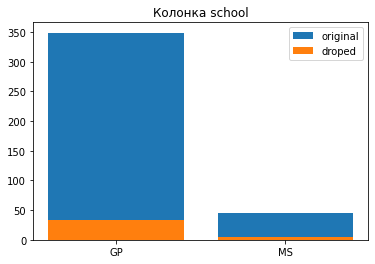

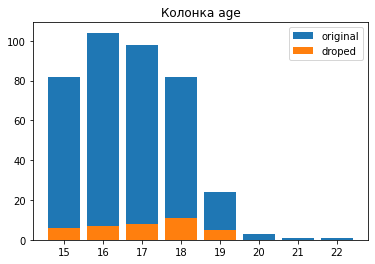

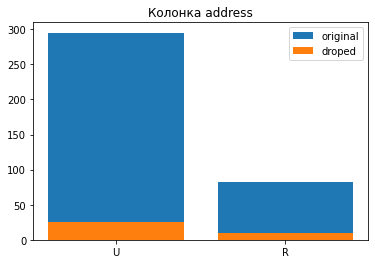

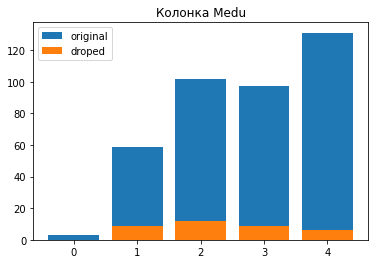

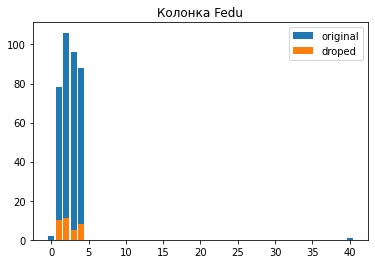

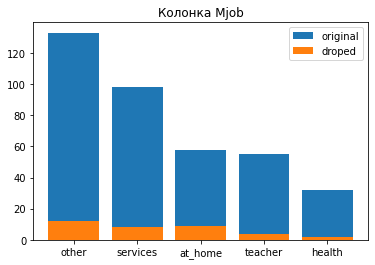

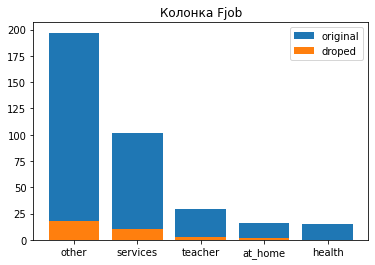

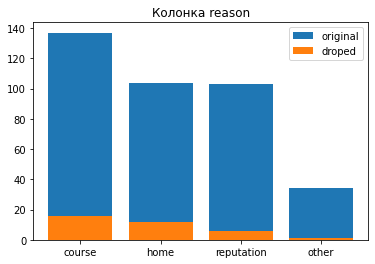

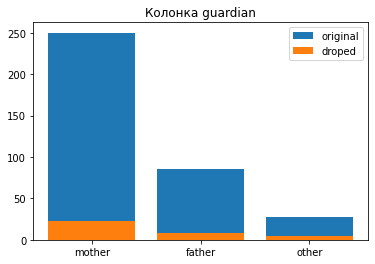

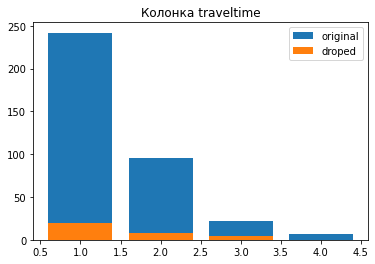

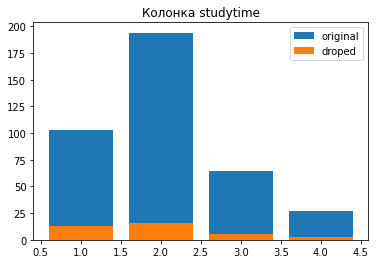

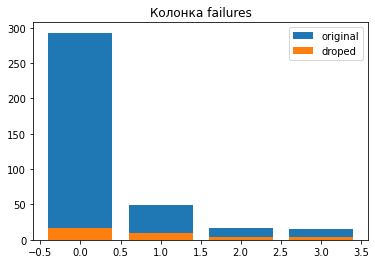

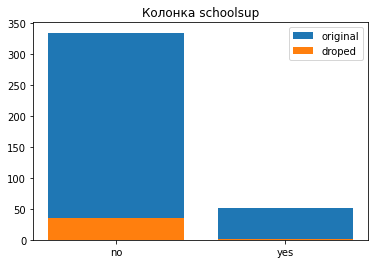

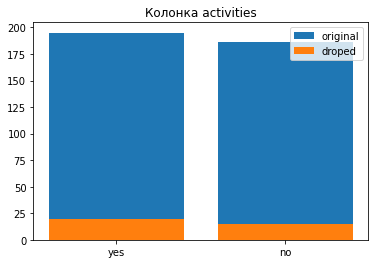

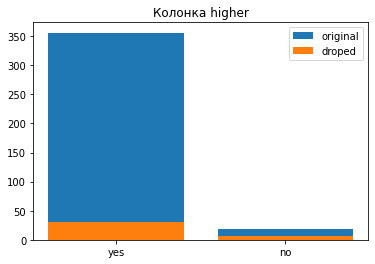

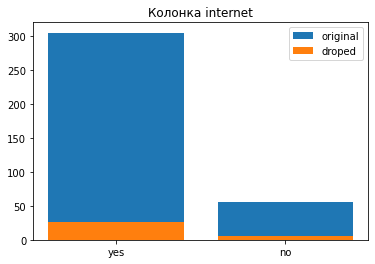

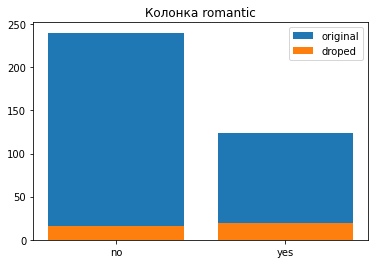

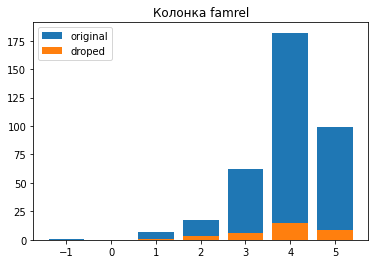

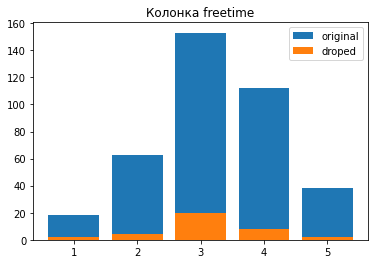

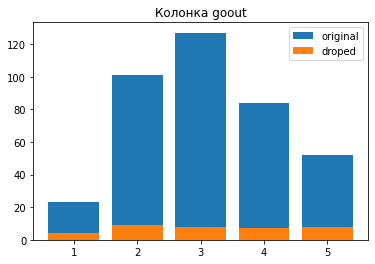

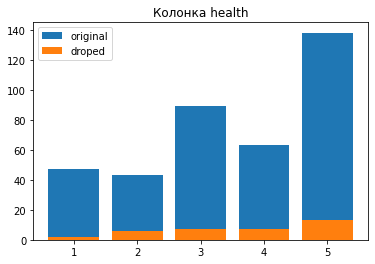

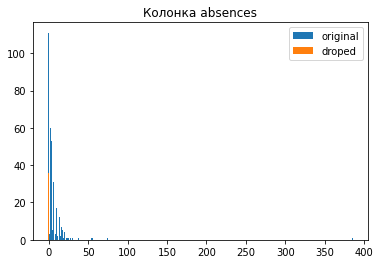

In [16]:
# Сравниваем графически исходную и удаляемую информацию по колонкам и значениям
for col in ['school', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
  compare_bars(col)

В колонках **failures > 1.5** и **higher = no** количество удаляемых строк сравнимо с общим количеством. Эти строки удалять не будем. 
В колонке **absences** для значений 0 к удалению примерно половина. В совокупности с тем фактом, что **score** для этих строк равно 0, логично предположить, что строки заполненны некорректно. Их удалим и посмотрим что теперь с данными колонки **absences**.

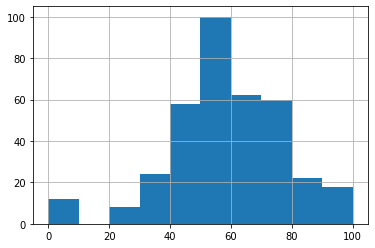

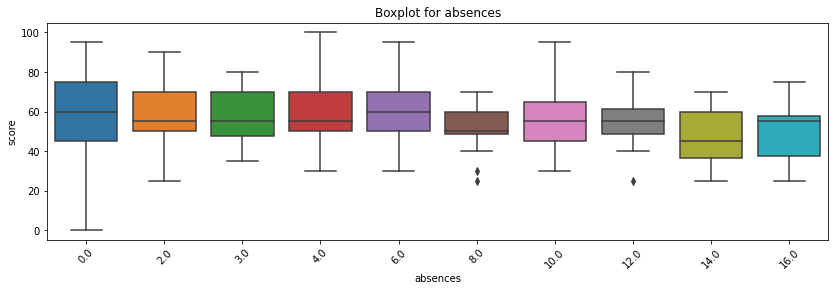

0.0      86
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, dtype: int64

In [17]:
data = stud_math.loc[(stud_math.score > 0) | stud_math.score.apply(lambda x: math.isnan(float(x))) | (stud_math.failures > 1.5) | (stud_math.higher == 'no')]
data.score.hist()
get_boxplot('absences')
data.absences.value_counts(ascending=False)

Гистограмма показывает, что между нулевыми и ненулевыми значениями существует разрыв, что говорит о том, что эти значения, очень вероятно, являются выбросами. Поскольку все же есть вероятность, что это не выбросы, заменим их минимальным ненулевым значением и посмотрим на результат. 

In [18]:
data = data.loc[(data.absences < 100) | data.absences.apply(lambda x: math.isnan(float(x)))]

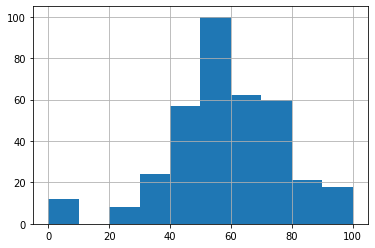

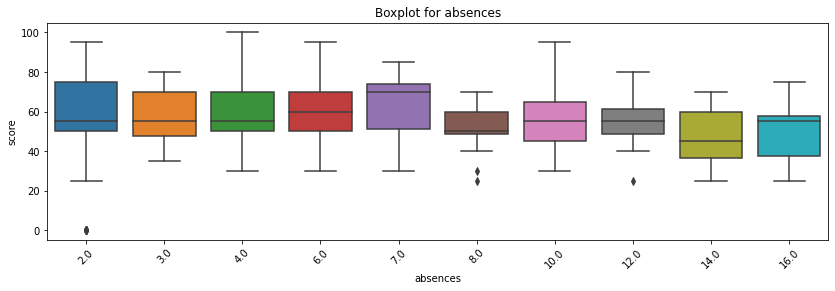

2.0     146
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
17.0      1
26.0      1
56.0      1
24.0      1
23.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
28.0      1
Name: absences, dtype: int64

In [19]:
mnz = data.absences.value_counts(ascending=False).index[1]
instead_zero('absences', mnz)
data.score.hist()
get_boxplot('absences')
data.absences.value_counts(ascending=False)

В данных присутствуют два значения на порядок выше остальных по одному разу. Это выбросы. Отфильтруем их.

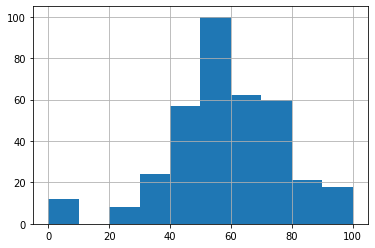

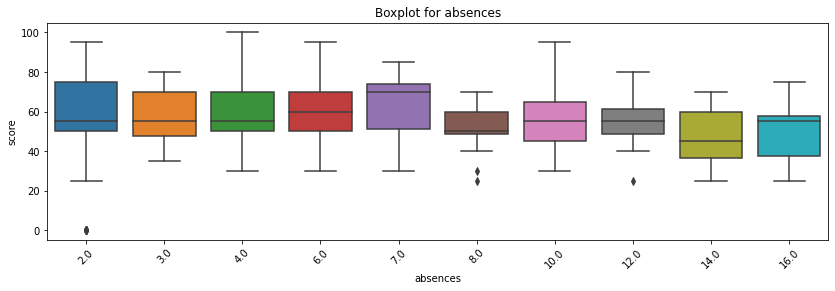

count    356.000000
mean       6.637640
std        7.893705
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [20]:
# Удаление выбросов с сохранением незаполненных значение (условие после "|")
data = data.loc[(data.absences < 100) | data.absences.apply(lambda x: math.isnan(float(x)))]
data.score.hist()
get_boxplot('absences')
data.absences.describe()

# Корреляционный анализ

Оценим корреляцию представленной информации

In [32]:
data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.144545,-0.132322,0.098121,-0.024195,0.202132,0.024401,0.067527,0.024393,0.151255,-0.061120,0.190007,-0.123508
Medu,-0.144545,1.000000,0.251085,-0.163455,0.074073,-0.226956,-0.074715,-0.008596,0.011266,0.040895,-0.033357,0.085607,0.191495
Fedu,-0.132322,0.251085,1.000000,0.035100,0.053743,-0.142224,-0.053863,0.045527,-0.076568,-0.039210,0.026980,0.006866,0.077644
traveltime,0.098121,-0.163455,0.035100,1.000000,-0.077758,0.066382,0.078584,-0.007921,-0.023494,0.024750,-0.010394,-0.004681,-0.030584
studytime,-0.024195,0.074073,0.053743,-0.077758,1.000000,-0.170132,-1.000000,0.069635,-0.127196,-0.033504,-0.095139,-0.067996,0.179707
failures,0.202132,-0.226956,-0.142224,0.066382,-0.170132,1.000000,0.171742,-0.028332,0.095408,0.136527,0.070389,0.074922,-0.397451
"studytime, granular",0.024401,-0.074715,-0.053863,0.078584,-1.000000,0.171742,1.000000,-0.070273,0.129378,0.033962,0.095802,0.068134,-0.181541
famrel,0.067527,-0.008596,0.045527,-0.007921,0.069635,-0.028332,-0.070273,1.000000,0.160320,0.042324,0.078815,-0.045826,0.070379
freetime,0.024393,0.011266,-0.076568,-0.023494,-0.127196,0.095408,0.129378,0.160320,1.000000,0.289929,0.055583,-0.077559,-0.015976
goout,0.151255,0.040895,-0.039210,0.024750,-0.033504,0.136527,0.033962,0.042324,0.289929,1.000000,-0.020359,0.023799,-0.167986


Видно, что столбцы **studytime** и **studytime, granular** полностью коррелируют со знаком "-". Более информативно понятным является studytime. Поэтому столбец **studytime**, granular удаляем.

In [33]:
data = data.drop(labels='studytime, granular', axis=1) 

# Отбор некоррелирующих колонок

Построим **boxplot** для анализа влияния значений столбцов на score и возможные выбросы в данных этих столбцов:

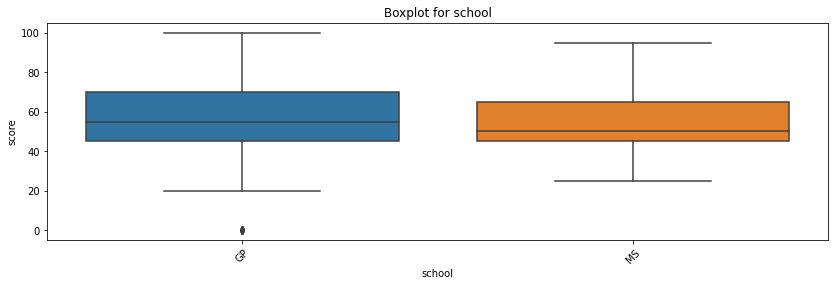

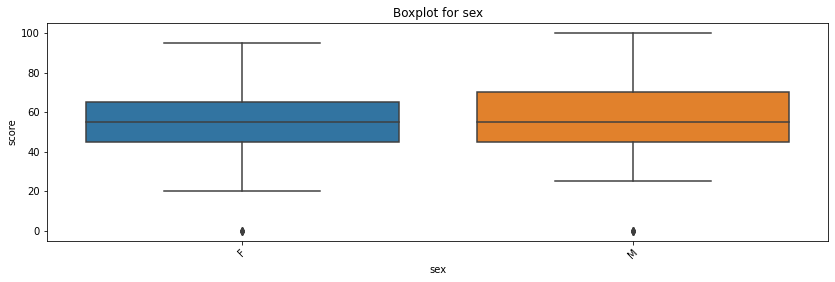

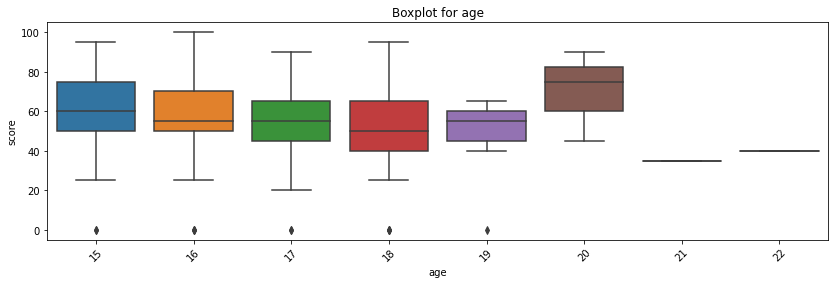

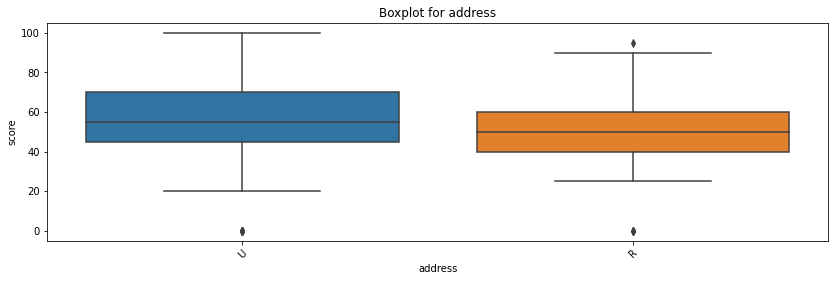

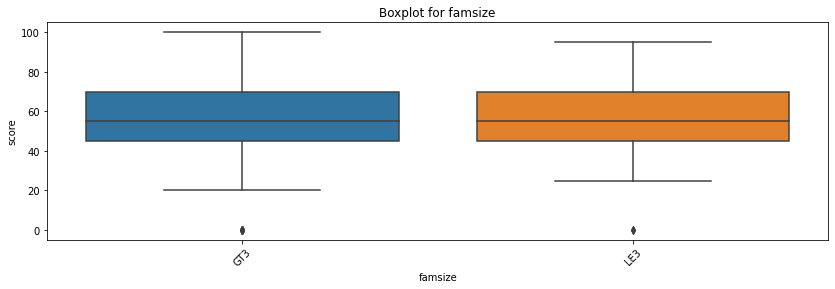

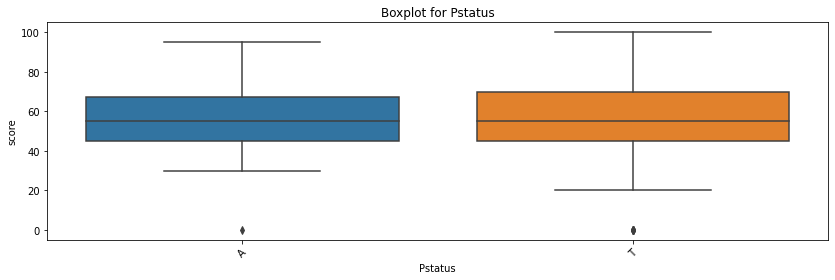

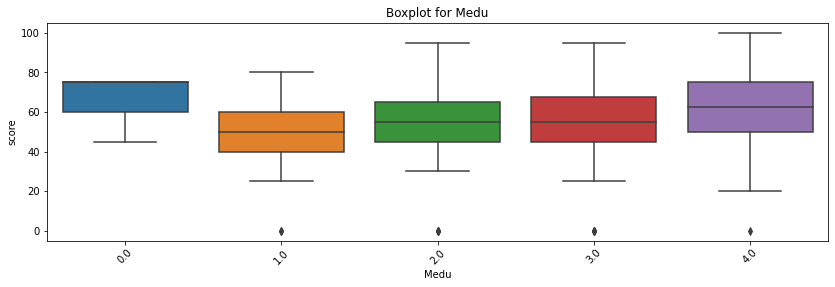

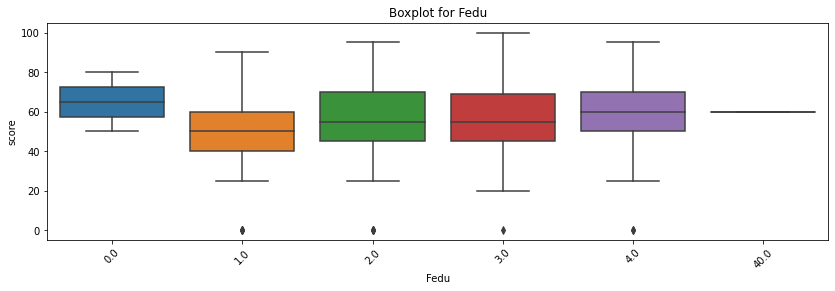

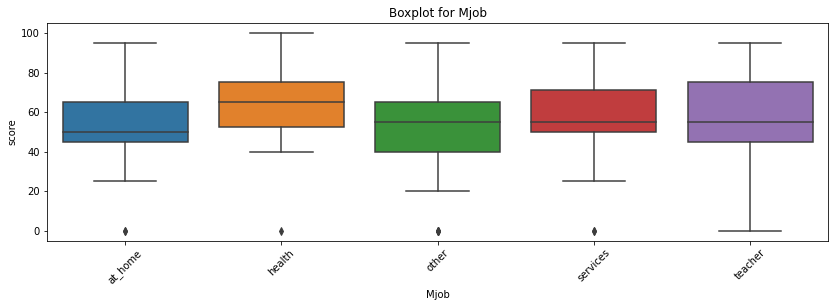

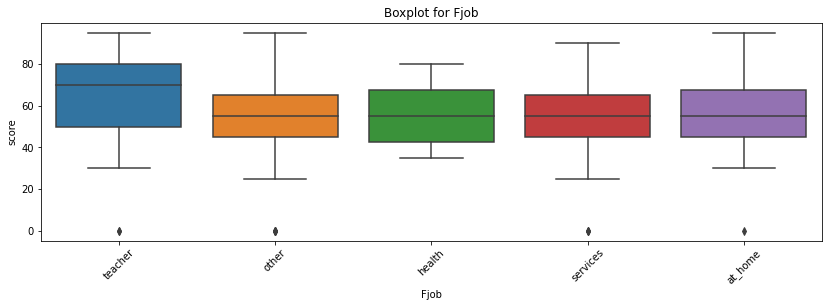

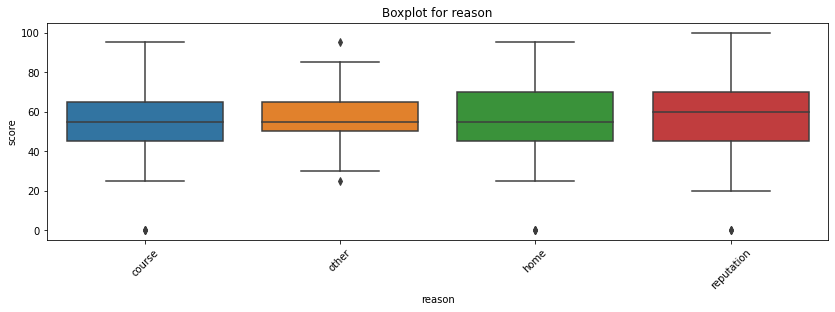

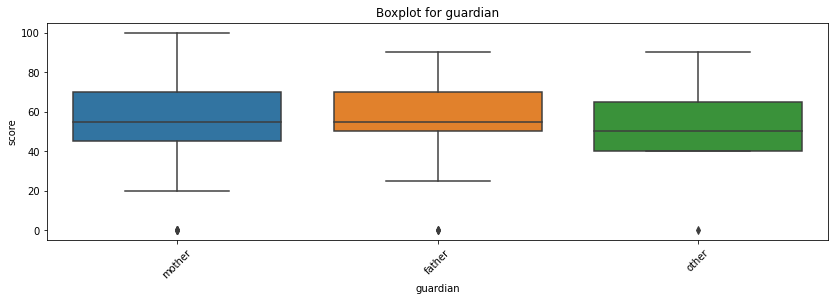

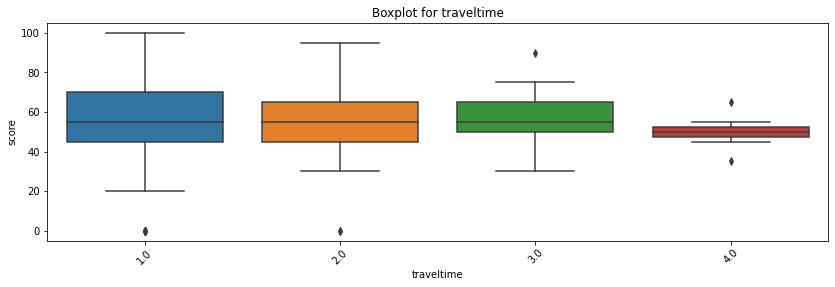

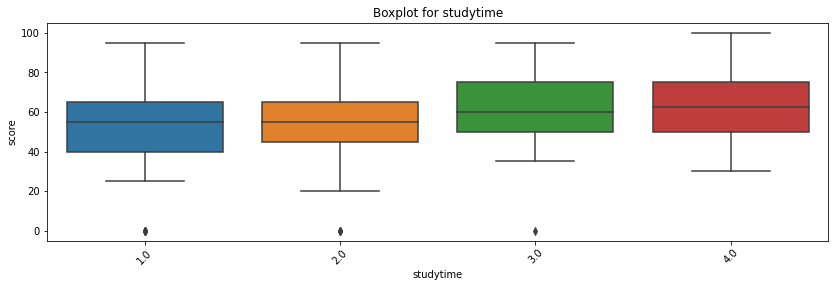

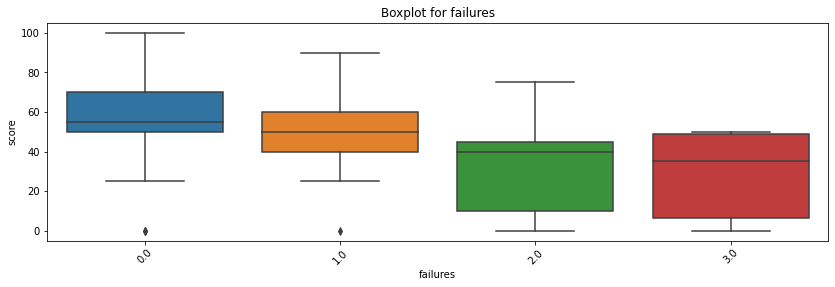

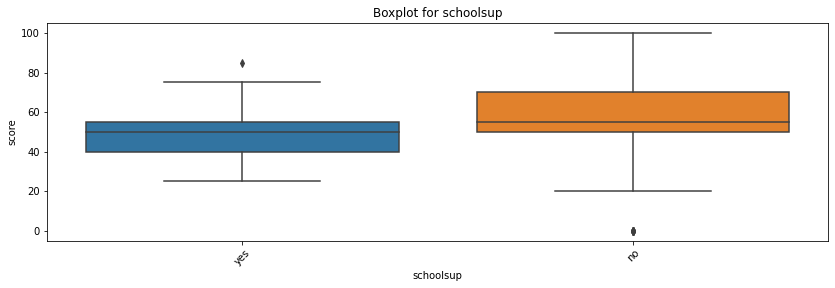

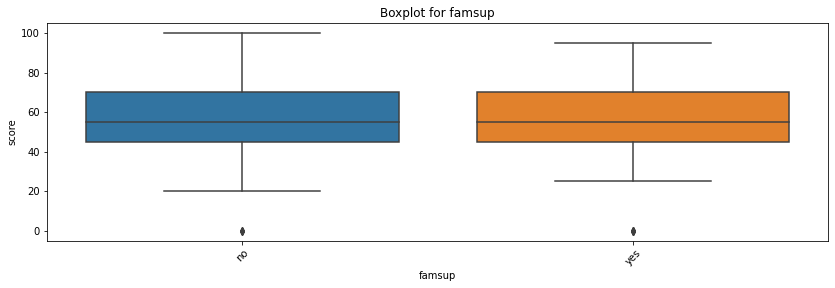

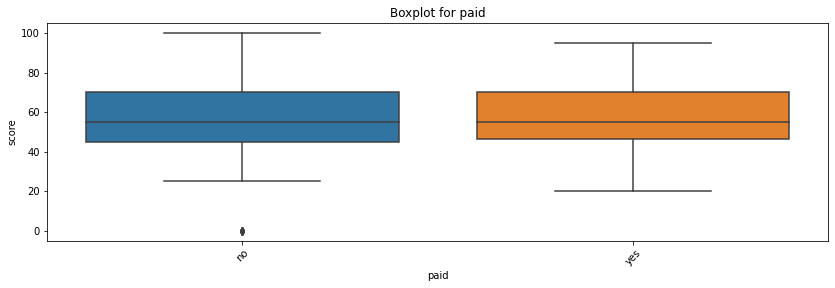

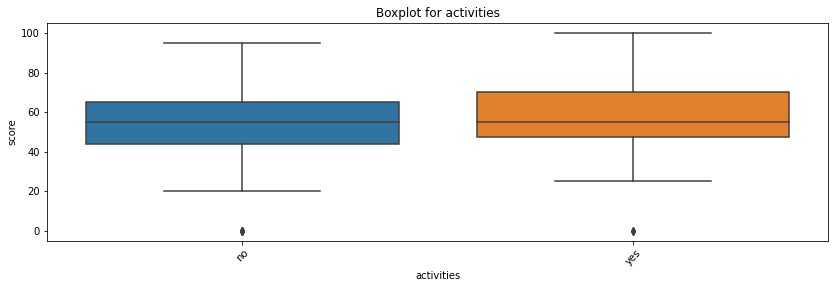

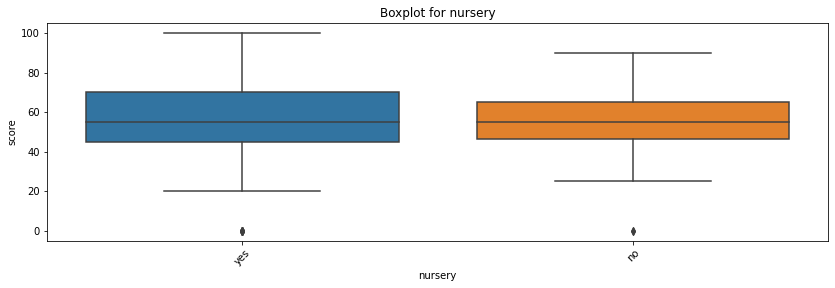

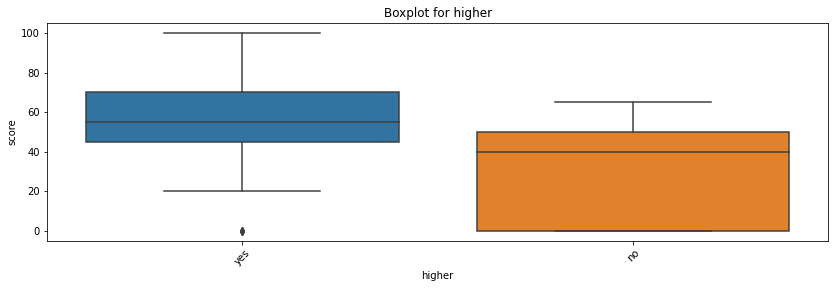

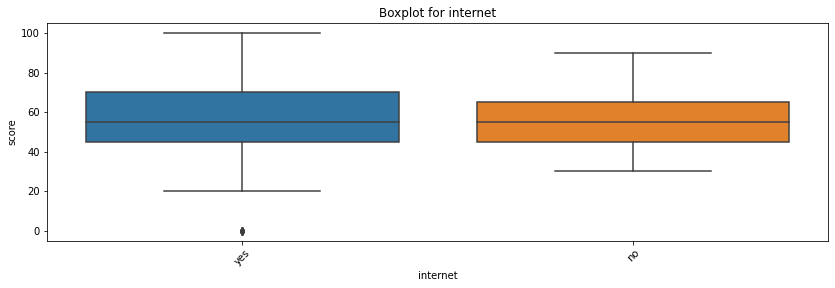

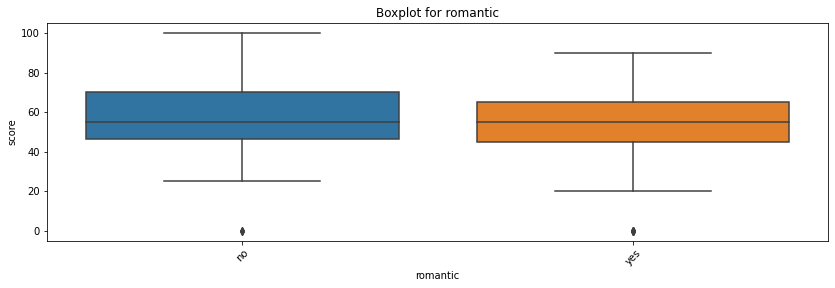

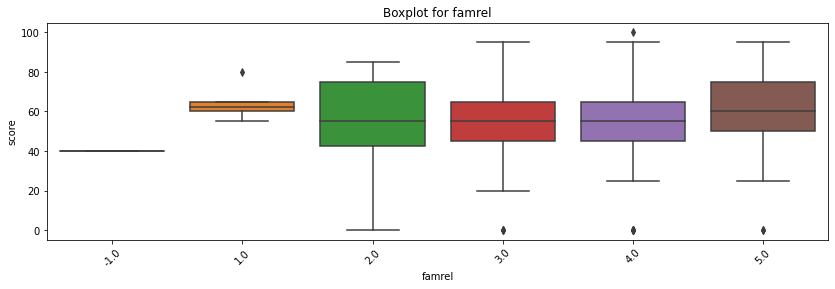

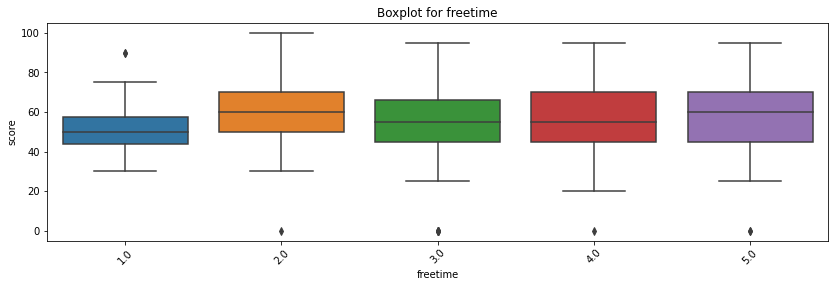

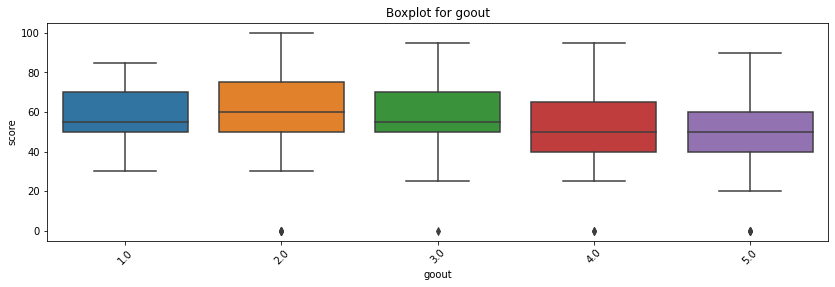

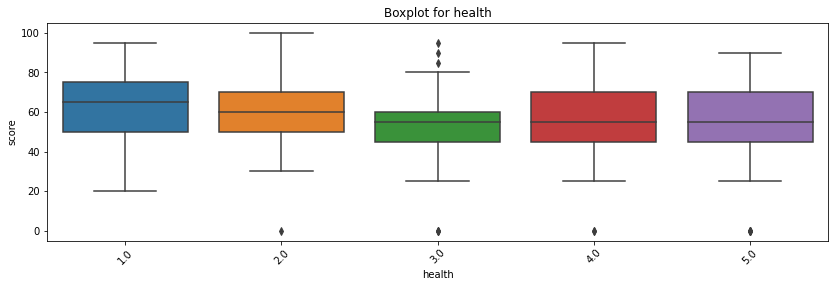

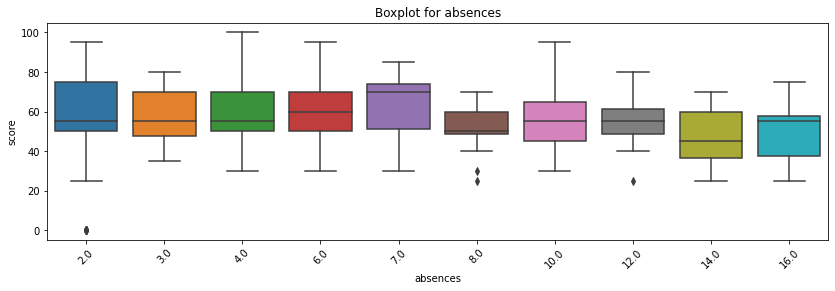

In [ ]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

Диаграммы показывают, что данные столбцов **sex, famsize, Pstatus, famsup, paid, nursery**  не влияют или мало влияют на оценку по математике. 
Предположительно, имеются выбросы в столбцах **age, Fedu, famrel**.
Значения **age** > 20, вероятно, не выброс, поскольку их малое количество может означать, что в классах присутствует малое количество возрастных учащихся. 
Проведем очистку данных для дальнейшего анализа.

In [21]:
data = data.drop(labels=['sex', 'famsize', 'Pstatus', 'famsup', 'paid', 'nursery'], axis=1) 

In [34]:
# Удаление выбросов с сохранением незаполненных значение (условие после "|")
data = data.loc[data.Fedu.between(0, 4) | data.Fedu.apply(lambda x: math.isnan(float(x)))] 
data = data.loc[(data.famrel > 0) | data.famrel.apply(lambda x: math.isnan(float(x)))]

# Анализ, фильтрация и заполнение незаполненных значений

Построим диаграммы обработанной таблицы

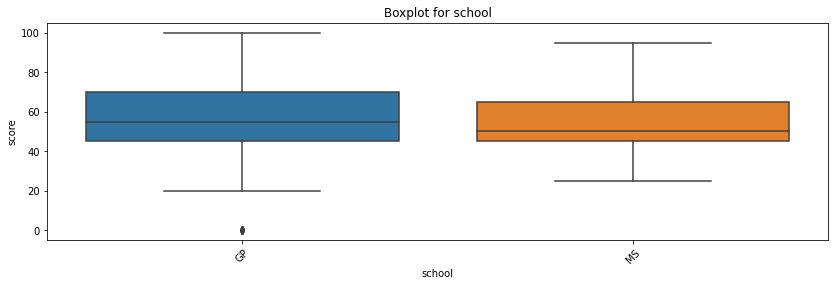

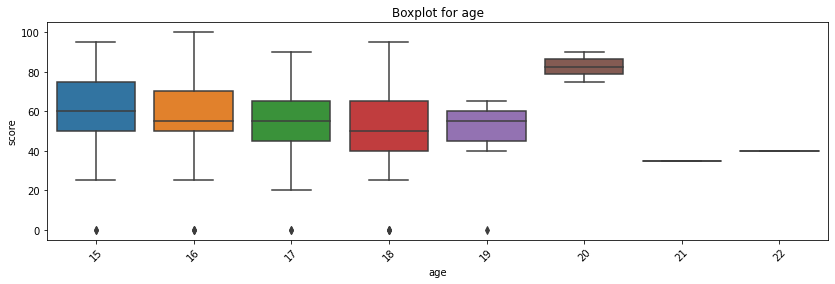

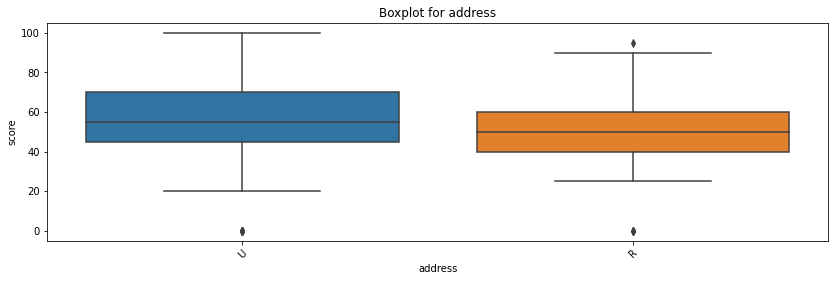

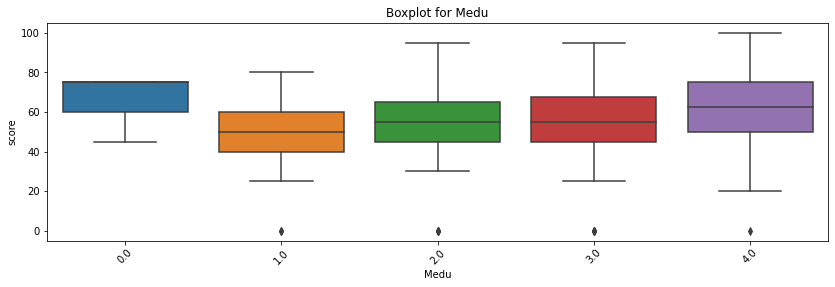

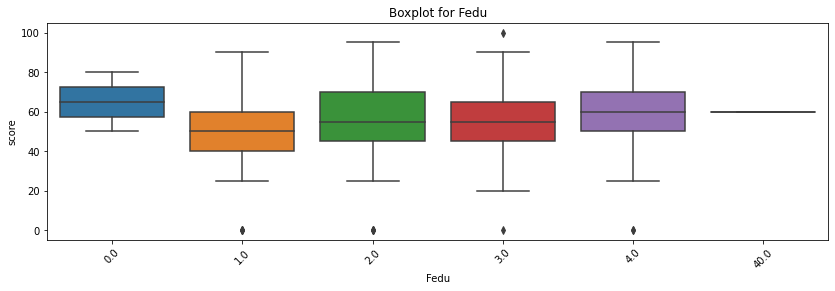

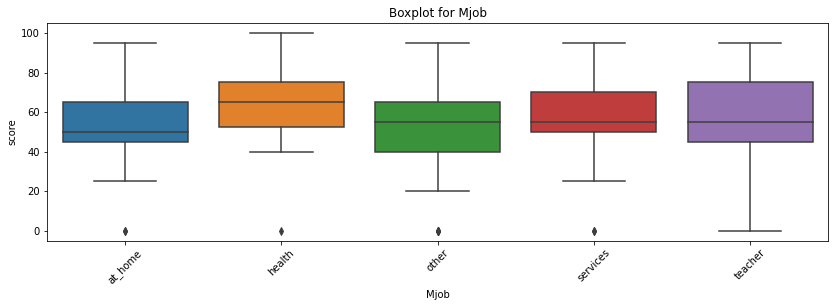

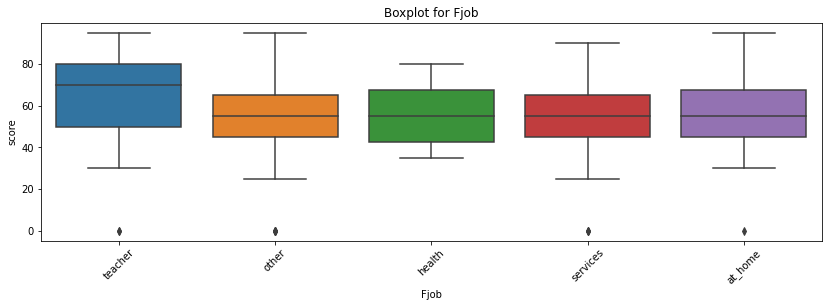

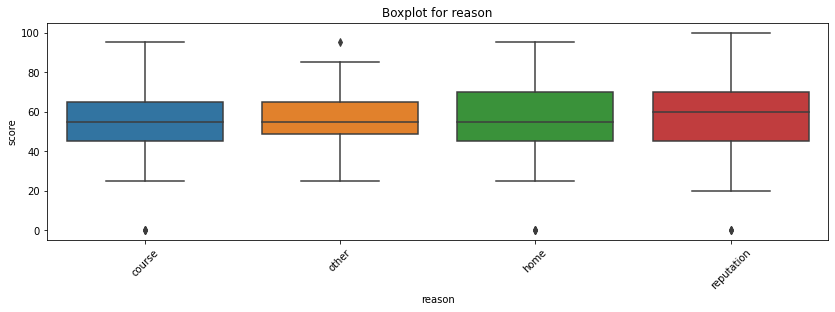

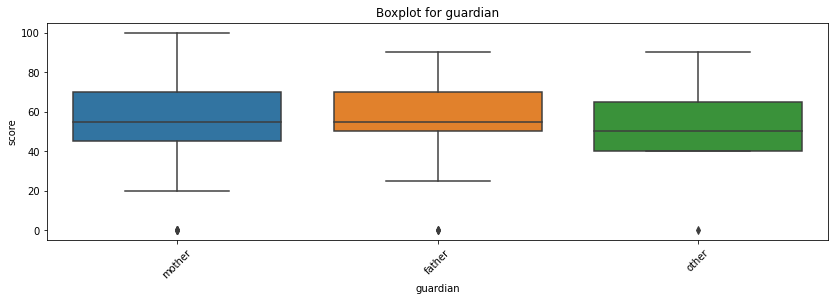

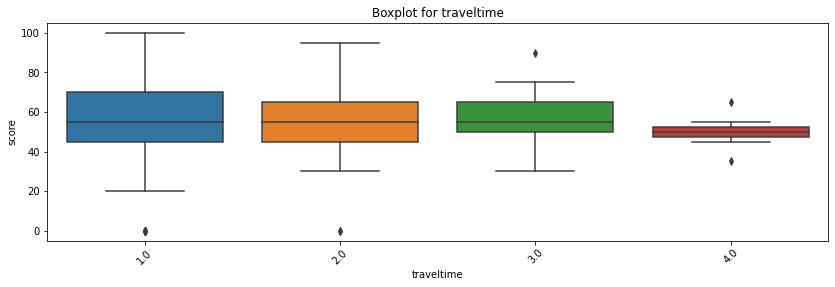

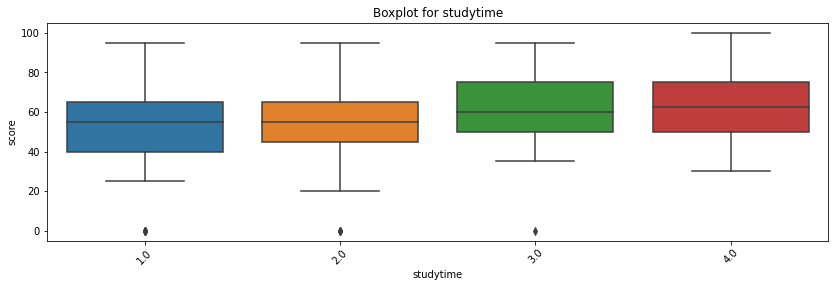

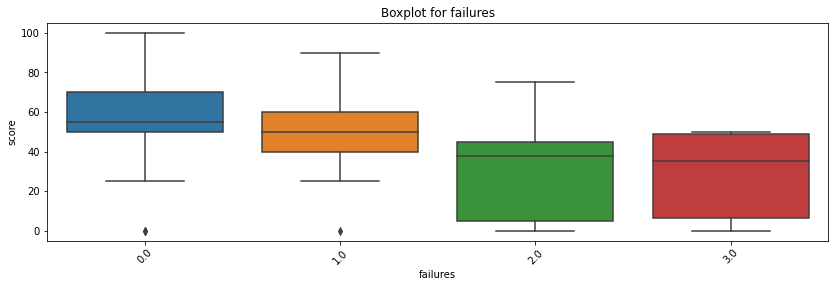

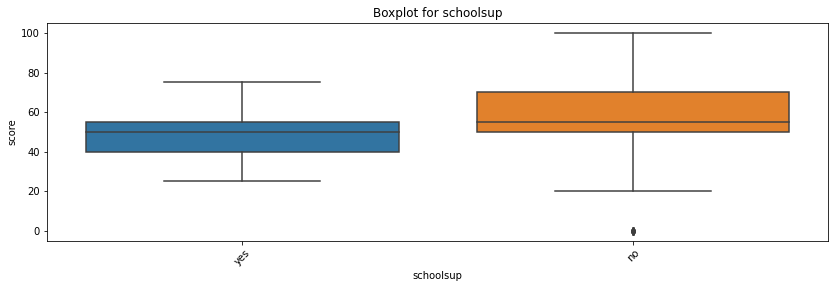

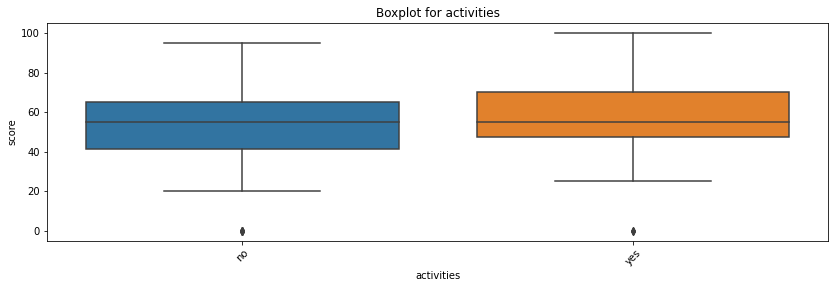

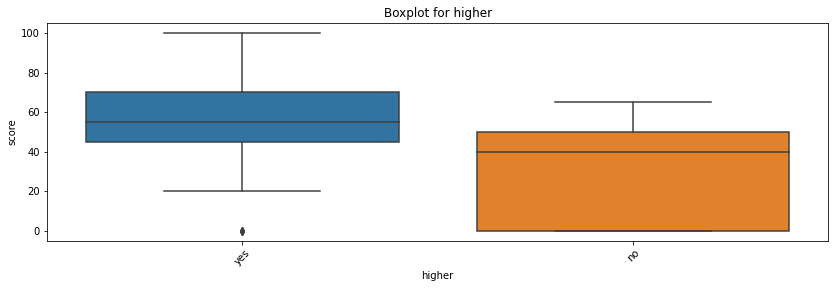

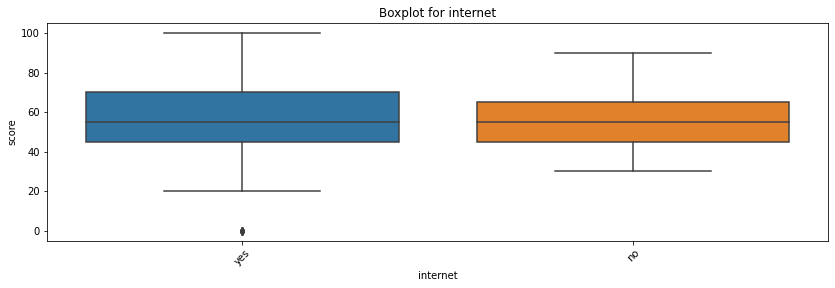

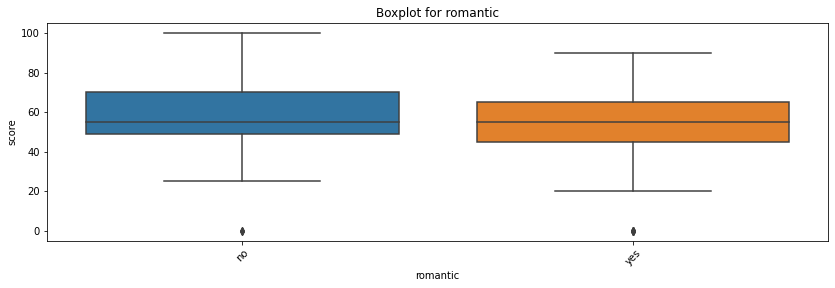

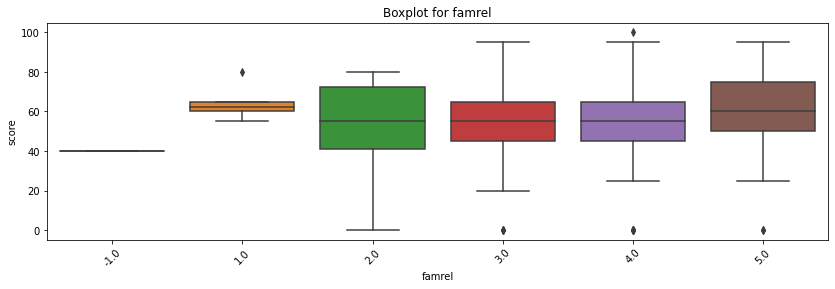

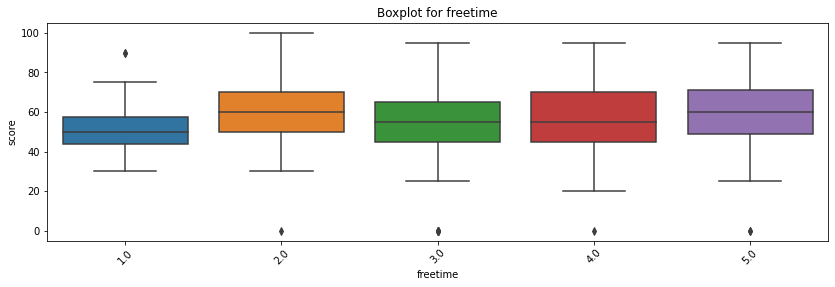

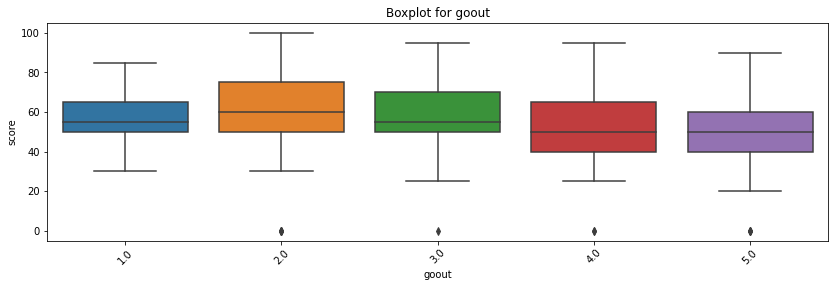

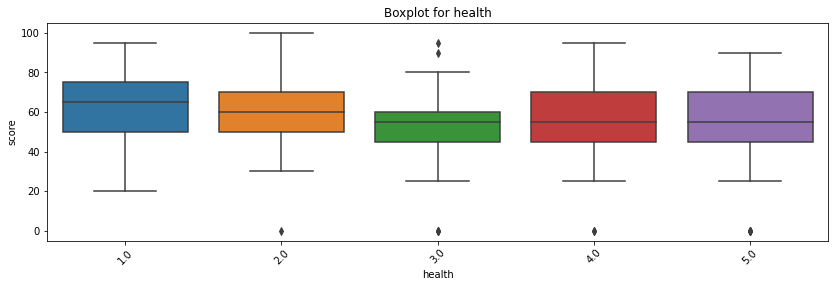

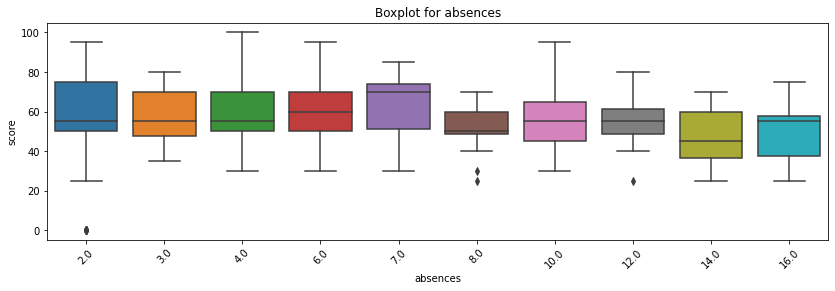

In [22]:
for col in ['school', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_boxplot(col)

Информация о номинативных столбцах. Изучим как и чем они заполнены и решим как заполнить отсутствующую информацию и имеет ли смысл ее заполнять 

In [23]:
for col in data.columns:
  column_info(col, False)


Nominative column >>
" school ": 

Уникальные значения ['GP' 'MS'].
Процент незаполненных 0.0%.
    school
GP     327
MS      41

Nominative column >>
" address ": 

Уникальные значения ['U' nan 'R'].
Процент незаполненных 4.35%.
   address
U      275
R       77

Nominative column >>
" Medu ": 

Уникальные значения [ 4.  1.  3.  2. nan  0.].
Процент незаполненных 0.82%.
     Medu
4.0   126
2.0    92
3.0    92
1.0    52
0.0     3

Nominative column >>
" Fedu ": 

Уникальные значения [ 4.  1.  2.  3. 40. nan  0.].
Процент незаполненных 5.98%.
      Fedu
2.0     98
3.0     91
4.0     82
1.0     72
0.0      2
40.0     1

Nominative column >>
" Mjob ": 

Уникальные значения ['at_home' 'health' 'other' 'services' 'teacher' nan].
Процент незаполненных 4.89%.
          Mjob
other      126
services    90
teacher     52
at_home     51
health      31

Nominative column >>
" Fjob ": 

Уникальные значения ['teacher' 'other' nan 'health' 'services' 'at_home'].
Процент незаполненных 8.97%.
         

Видно 2 категории номинативных стольцов: чисто номинативные, где значения представлены в виде строк, и числовые номинативные - значения представлены числами. Причем, чем больше число, тем выше "статус" значения. Для последних предлагается заменить незаполненные значения средними значениями. Тем самым, с точки зрения статистики данные не будут сильно искажены и останется информация о том в каких колонка данные не были заполнены (там будут дробные значения). 

In [26]:
mean_fillna(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health'])

Строковые номинативные столбцы дополним соответствующими модами

In [28]:
mode_fillna(['address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'activities', 'higher', 'internet', 'romantic'])


Проверим заполнение теперь:

In [35]:
for col in data.columns:
  column_info(col, False)


Nominative column >>
" school ": 

Уникальные значения ['GP' 'MS'].
Процент незаполненных 0.0%.
    school
GP     325
MS      41

Nominative column >>
" address ": 

Уникальные значения ['U' 'R'].
Процент незаполненных 0.0%.
   address
U      289
R       77

Nominative column >>
" Medu ": 

Уникальные значения [4.         1.         3.         2.         2.78356164 0.        ].
Процент незаполненных 0.0%.
          Medu
4.000000   126
3.000000    92
2.000000    90
1.000000    52
2.783562     3
0.000000     3

Nominative column >>
" Fedu ": 

Уникальные значения [4.         1.         2.         3.         2.62716763 0.        ].
Процент незаполненных 0.0%.
          Fedu
2.000000    97
3.000000    91
4.000000    82
1.000000    72
2.627168    22
0.000000     2

Nominative column >>
" Mjob ": 

Уникальные значения ['at_home' 'health' 'other' 'services' 'teacher'].
Процент незаполненных 0.0%.
          Mjob
other      144
services    88
teacher     52
at_home     51
health      31

Nomin

Заполнение числовых колонок:

In [ ]:
for col in data.columns:
  column_info(col, True)


Numbers column >>
" age ": 

Процент незаполненных 0.0%.

Numbers column >>
" traveltime ": 

Процент незаполненных 0.0%.

Numbers column >>
" studytime ": 

Процент незаполненных 0.0%.

Numbers column >>
" failures ": 

Процент незаполненных 0.0%.

Numbers column >>
" absences ": 

Процент незаполненных 3.26%.

Numbers column >>
" score ": 

Процент незаполненных 1.63%.


Из числовых столбцов незаполненных элементы в столбцах **score** и **absences**. Заполним их средними значениями

In [30]:
mean_fillna(['absences', 'score'])

Проверим заполнение


In [31]:
for col in ['absences', 'score']:
  column_info(col, True)


Numbers column >>
" absences ": 

Процент незаполненных 0.0%.

Numbers column >>
" score ": 

Процент незаполненных 0.0%.


# Окончательная проверка откорректированной таблице на выбросы **score**

In [36]:
quantiles_info(data.score)

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


 Проверим выбросы


In [37]:
data[(data.score < 7.5) |  (data.score > 107.5)]

,school,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,activities,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,18,R,2.000000,2.000000,other,other,reputation,mother,1.000000,1.0,2.000000,no,yes,yes,yes,no,3.000000,3.0,3.0,4.000000,2.00000,0.0
130,GP,15,R,3.000000,4.000000,services,teacher,course,father,2.000000,3.0,2.000000,no,no,yes,yes,yes,4.000000,2.0,2.0,5.000000,2.00000,0.0
137,GP,16,U,3.000000,2.627168,other,other,course,other,1.428571,1.0,2.000000,no,yes,yes,yes,yes,4.000000,3.0,2.0,5.000000,2.00000,0.0
144,GP,17,U,2.000000,1.000000,other,other,home,mother,1.000000,1.0,3.000000,no,no,yes,yes,no,5.000000,4.0,5.0,5.000000,2.00000,0.0
146,GP,15,U,3.000000,2.000000,health,services,home,father,1.000000,2.0,3.000000,no,no,yes,yes,no,3.000000,3.0,2.0,3.000000,2.00000,0.0
148,GP,16,U,4.000000,4.000000,teacher,teacher,course,mother,1.000000,1.0,0.000000,no,no,no,yes,yes,3.000000,3.0,2.0,5.000000,2.00000,0.0
150,GP,18,U,1.000000,1.000000,other,other,course,mother,1.000000,1.0,3.000000,no,no,no,yes,yes,2.000000,3.0,5.0,4.000000,6.63764,0.0
153,GP,19,U,3.000000,2.000000,services,at_home,home,mother,1.000000,1.0,0.331412,no,no,no,yes,yes,4.000000,5.0,4.0,3.533898,2.00000,0.0
160,GP,17,R,2.000000,1.000000,at_home,other,course,mother,1.428571,1.0,2.000000,no,yes,no,yes,yes,3.944606,3.0,2.0,5.000000,2.00000,0.0
173,GP,16,U,1.000000,3.000000,at_home,services,home,mother,1.000000,2.0,3.000000,no,yes,yes,yes,yes,4.000000,3.0,5.0,3.000000,2.00000,0.0


Поскольку эти строки оставлены, чтобы не нарушить статистику по другим столбцам, заменим **score = 0** на средние значения и снова проверим выбросы

In [38]:
mn = data.score.mean()
instead_zero('score', mn)
quantiles_info(data.score)

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


In [39]:
data[(data.score < 20) |  (data.score > 100)]

,school,age,address,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,activities,higher,internet,romantic,famrel,freetime,goout,health,absences,score


# Выводы

Сравним исходную и преобразованную целевую колонку

In [40]:
data.score.describe()

count    366.000000
mean      57.663389
std       15.786755
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [41]:
stud_math.score.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Ожидаемо возрасло среднее значени и уменьшилось стандартное отклонение за счет удаления и замены строк с нулевыми значениями. Также возросло значение первого квартиля. Соответственно изменилось минимальное значение. Значения второго, третьего квартиля и максимальное значения не изменились. 


В результате анализа влияния собранных данных на оценку по математике сделаны следующие выводы:
*   В данных достаточно много пустых значений. По ситуации информация была дополнена, либо удалена
*   Выбросы найдены в столбцах **score, absences, Fedu, famrel**
*   Коэффициент корреляции -1 столбцов **studytime** и **studytime, granular** позволил исключить полностью колонку
*   Подробный анализ целевого столбца **score** позволил исключить часть строк с нулевыми значениями 


